# Módulo 07, Tarefa 01

Vamos começar a mexer na nossa base de projeto? Já fizemos um exercício de montar a variável resposta, já pudemos perceber que essa atividade pode não ser trivial. Vamos agora trabalhar a base para que fique propícia ao *scikitlearn* para trabalharmos.

Lembrando, a base se chama demo01.csv, e originalmente está publicada [aqui](https://www.kaggle.com/rikdifos/credit-card-approval-prediction).

#### 1) Carregue a base e avalie:

- As variáveis
- Tipos de dados de cada variável
- Quantidade de missings
- Distribuição da variável resposta (mau)

1. Carregando a Base de Dados:

In [1]:
import pandas as pd

# Carregar a base de dados
data = pd.read_csv("demo01.csv")


Avaliando as Variáveis e Tipos de Dados:

In [2]:
# Exibir informações sobre as variáveis e tipos de dados
print(data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16650 entries, 0 to 16649
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   sexo                   16650 non-null  object 
 1   posse_de_veiculo       16650 non-null  object 
 2   posse_de_imovel        16650 non-null  object 
 3   qtd_filhos             16650 non-null  int64  
 4   tipo_renda             16650 non-null  object 
 5   educacao               16650 non-null  object 
 6   estado_civil           16650 non-null  object 
 7   tipo_residencia        16650 non-null  object 
 8   idade                  16650 non-null  float64
 9   tempo_emprego          16650 non-null  float64
 10  possui_celular         16650 non-null  int64  
 11  possui_fone_comercial  16650 non-null  int64  
 12  possui_fone            16650 non-null  int64  
 13  possui_email           16650 non-null  int64  
 14  qt_pessoas_residencia  16650 non-null  float64
 15  ma

Quantidade de Dados Ausentes:

In [4]:
# Verificar a quantidade de dados ausentes em cada variável
missing_data = data.isnull().sum()
print(missing_data)


sexo                     0
posse_de_veiculo         0
posse_de_imovel          0
qtd_filhos               0
tipo_renda               0
educacao                 0
estado_civil             0
tipo_residencia          0
idade                    0
tempo_emprego            0
possui_celular           0
possui_fone_comercial    0
possui_fone              0
possui_email             0
qt_pessoas_residencia    0
mau                      0
dtype: int64


 Distribuição da Variável Resposta "mau":

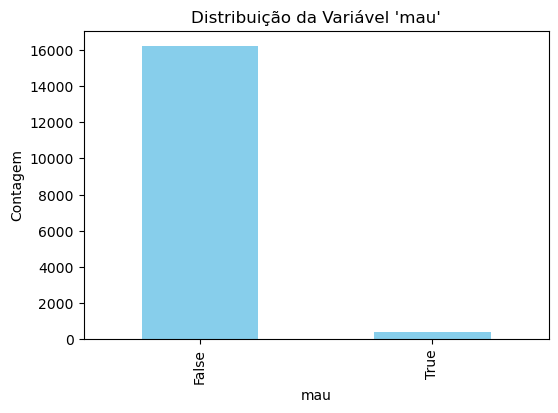

In [5]:
# Visualizar a distribuição da variável "mau"
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
data['mau'].value_counts().plot(kind='bar', color='skyblue')
plt.title("Distribuição da Variável 'mau'")
plt.xlabel("mau")
plt.ylabel("Contagem")
plt.show()


#### 2) Vamos montar um metadados

1. Crie um dataframe com os nomes de cada variável e o tipo de dados de cada variável.
2. Adicione uma coluna nesse *dataframe* chamada "qtd_categorias" e coloque nela o número de categorias correspondente de cada variável. 
    Dica: 
        1. inicie uma lista vazia
        2. faça um for ao longo dos nomes das variáveis, 
        3. conte o número de categorias dessa variável 
        4. acumule essa informação de 3. na lista que você criou em 1. 
        5. No final, essa lista pode ser atribuída à nossa variável.
3. Crie variáveis dummy para as variáveis necessárias (i.e. aquelas que são qualitativas e não estão armazenadas como {0, 1} ou {True, False}.

DataFrame: 

In [20]:
import pandas as pd

# Carregar o arquivo CSV em um DataFrame
df_demo01 = pd.read_csv('demo01.csv')

# Exibir as primeiras linhas do DataFrame para verificar os dados
print(df_demo01.head())


  sexo posse_de_veiculo posse_de_imovel  qtd_filhos            tipo_renda  \
0    M                Y               Y           0               Working   
1    F                N               Y           0  Commercial associate   
2    F                N               Y           0  Commercial associate   
3    M                Y               Y           0               Working   
4    F                Y               N           0               Working   

                        educacao          estado_civil    tipo_residencia  \
0  Secondary / secondary special               Married  House / apartment   
1  Secondary / secondary special  Single / not married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3               Higher education               Married  House / apartment   
4              Incomplete higher               Married  House / apartment   

       idade  tempo_emprego  possui_celular  possui_fone_comercial  \
0  5

Adicionar a Coluna 'qtd_categorias':

In [35]:
# Listar as variáveis qualitativas
variaveis_qualitativas = [col for col in df_demo01.columns if df_demo01[col].dtype == 'object']

# Exibir as variáveis qualitativas
print(variaveis_qualitativas)


['sexo', 'posse_de_veiculo', 'posse_de_imovel', 'tipo_renda', 'educacao', 'estado_civil', 'tipo_residencia']


In [34]:
# Inicializar uma lista vazia para armazenar o número de categorias
qtd_categorias = []

# Calcular o número de categorias para cada variável
for col in df_demo01.columns:
    num_categorias = len(df_demo01[col].unique()) if df_demo01[col].dtype == 'object' else None
    qtd_categorias.append(num_categorias)

# Adicionar a coluna "qtd_categorias" ao DataFrame de metadados
metadados['qtd_categorias'] = qtd_categorias

# Exibir o DataFrame de metadados atualizado
print(metadados)


                 Variável Tipo de Dados  qtd_categorias
0                    sexo        object             2.0
1        posse_de_veiculo        object             2.0
2         posse_de_imovel        object             2.0
3              qtd_filhos         int64             NaN
4              tipo_renda        object             5.0
5                educacao        object             5.0
6            estado_civil        object             5.0
7         tipo_residencia        object             6.0
8                   idade       float64             NaN
9           tempo_emprego       float64             NaN
10         possui_celular         int64             NaN
11  possui_fone_comercial         int64             NaN
12            possui_fone         int64             NaN
13           possui_email         int64             NaN
14  qt_pessoas_residencia       float64             NaN
15                    mau          bool             NaN


In [36]:
# Filtrar as variáveis qualitativas relevantes
variaveis_qualitativas_relevantes = ['sexo', 'posse_de_veiculo', 'posse_de_imovel', 'tipo_renda', 'educacao', 'estado_civil', 'tipo_residencia']

# Criar variáveis dummy para as variáveis qualitativas relevantes
df_demo01 = pd.get_dummies(df_demo01, columns=variaveis_qualitativas_relevantes, drop_first=True)

# Exibir o DataFrame com as variáveis dummy
print(df_demo01)



       qtd_filhos      idade  tempo_emprego  possui_celular  \
0               0  58.832877       3.106849               1   
1               0  52.356164       8.358904               1   
2               0  52.356164       8.358904               1   
3               0  46.224658       2.106849               1   
4               0  29.230137       3.021918               1   
...           ...        ...            ...             ...   
16645           0  54.109589       9.884932               1   
16646           0  43.389041       7.380822               1   
16647           0  30.005479       9.800000               1   
16648           0  30.005479       9.800000               1   
16649           0  33.936986       3.630137               1   

       possui_fone_comercial  possui_fone  possui_email  \
0                          0            0             0   
1                          0            1             1   
2                          0            1             1   
3      

In [37]:
# Exibir o DataFrame de metadados atualizado
print(metadados)

                 Variável Tipo de Dados  qtd_categorias
0                    sexo        object             2.0
1        posse_de_veiculo        object             2.0
2         posse_de_imovel        object             2.0
3              qtd_filhos         int64             NaN
4              tipo_renda        object             5.0
5                educacao        object             5.0
6            estado_civil        object             5.0
7         tipo_residencia        object             6.0
8                   idade       float64             NaN
9           tempo_emprego       float64             NaN
10         possui_celular         int64             NaN
11  possui_fone_comercial         int64             NaN
12            possui_fone         int64             NaN
13           possui_email         int64             NaN
14  qt_pessoas_residencia       float64             NaN
15                    mau          bool             NaN


In [41]:
import pandas as pd

# Carregue o DataFrame a partir do arquivo CSV
df_demo01 = pd.read_csv('demo01.csv')

# Listar as variáveis qualitativas
variaveis_qualitativas = df_demo01.select_dtypes(include=['object']).columns

# Criar variáveis dummy para as variáveis qualitativas
df_demo01 = pd.get_dummies(df_demo01, columns=variaveis_qualitativas, drop_first=True)

# Exibir o DataFrame com as variáveis dummy
print(df_demo01)


       qtd_filhos      idade  tempo_emprego  possui_celular  \
0               0  58.832877       3.106849               1   
1               0  52.356164       8.358904               1   
2               0  52.356164       8.358904               1   
3               0  46.224658       2.106849               1   
4               0  29.230137       3.021918               1   
...           ...        ...            ...             ...   
16645           0  54.109589       9.884932               1   
16646           0  43.389041       7.380822               1   
16647           0  30.005479       9.800000               1   
16648           0  30.005479       9.800000               1   
16649           0  33.936986       3.630137               1   

       possui_fone_comercial  possui_fone  possui_email  \
0                          0            0             0   
1                          0            1             1   
2                          0            1             1   
3      

Dummy

In [43]:
import pandas as pd

# Carregue o DataFrame a partir do arquivo CSV
df_demo01 = pd.read_csv('demo01.csv')

# Listar as variáveis qualitativas
variaveis_qualitativas = df_demo01.select_dtypes(include=['object']).columns

# Se houver variáveis qualitativas, crie variáveis dummy para elas
if len(variaveis_qualitativas) > 0:
    df_demo01 = pd.get_dummies(df_demo01, columns=variaveis_qualitativas, drop_first=True)

# Exibir o DataFrame com as variáveis dummy (se foram criadas)
print(df_demo01)



       qtd_filhos      idade  tempo_emprego  possui_celular  \
0               0  58.832877       3.106849               1   
1               0  52.356164       8.358904               1   
2               0  52.356164       8.358904               1   
3               0  46.224658       2.106849               1   
4               0  29.230137       3.021918               1   
...           ...        ...            ...             ...   
16645           0  54.109589       9.884932               1   
16646           0  43.389041       7.380822               1   
16647           0  30.005479       9.800000               1   
16648           0  30.005479       9.800000               1   
16649           0  33.936986       3.630137               1   

       possui_fone_comercial  possui_fone  possui_email  \
0                          0            0             0   
1                          0            1             1   
2                          0            1             1   
3      

#### 3) Crie variáveis dummy para as variáveis necessárias (i.e. aquelas que são qualitativas e não estão armazenadas como {0, 1} ou {True, False}. Crie um *dataframe* apenas com as variáveis apropriadas para entrada no scikitlearn - elimine as variáveis tipo *str*, mantendo apenas suas versões *dummy*.

In [48]:
import pandas as pd

# Carregue o DataFrame a partir do arquivo CSV
df_demo01 = pd.read_csv('demo01.csv')

# Liste as variáveis qualitativas
variaveis_qualitativas = df_demo01.select_dtypes(include=['object']).columns

# Crie variáveis dummy para as variáveis qualitativas
df_demo01 = pd.get_dummies(df_demo01, columns=variaveis_qualitativas, drop_first=True)

# Crie um novo DataFrame apenas com as variáveis apropriadas para o scikit-learn
df_scikit_learn = df_demo01.select_dtypes(exclude=['object'])

# Exibir o novo DataFrame pronto para uso no scikit-learn
print(df_scikit_learn)





       qtd_filhos      idade  tempo_emprego  possui_celular  \
0               0  58.832877       3.106849               1   
1               0  52.356164       8.358904               1   
2               0  52.356164       8.358904               1   
3               0  46.224658       2.106849               1   
4               0  29.230137       3.021918               1   
...           ...        ...            ...             ...   
16645           0  54.109589       9.884932               1   
16646           0  43.389041       7.380822               1   
16647           0  30.005479       9.800000               1   
16648           0  30.005479       9.800000               1   
16649           0  33.936986       3.630137               1   

       possui_fone_comercial  possui_fone  possui_email  \
0                          0            0             0   
1                          0            1             1   
2                          0            1             1   
3      

#### 4) Qual variável é mais poderosa?

Considere as variáveis ```possui_email``` e ```posse_de_veiculo```. Faça uma tabela cruzada entre elas e responda qual delas te parece mais poderosa para prever a probabilidade de ```mau = 1```?

In [50]:
# Exibir os valores únicos na coluna 'mau'
unique_values_mau = df_demo01['mau'].unique()
print(unique_values_mau)


[False  True]


In [54]:
import pandas as pd

# Calcular as proporções de 'mau = True' para cada categoria de 'possui_email'
prop_email = df_demo01.groupby('possui_email')['mau'].mean()

# Calcular as proporções de 'mau = True' para cada categoria de 'posse_de_veiculo'
prop_veiculo = df_demo01.groupby('posse_de_veiculo')['mau'].mean()

# Exibir as proporções
print("Proporções de 'mau = True' para cada categoria de 'possui_email':")
print(prop_email)

print("\nProporções de 'mau = True' para cada categoria de 'posse_de_veiculo':")
print(prop_veiculo)


Proporções de 'mau = True' para cada categoria de 'possui_email':
possui_email
0    0.023731
1    0.020270
Name: mau, dtype: float64

Proporções de 'mau = True' para cada categoria de 'posse_de_veiculo':
posse_de_veiculo
N    0.024268
Y    0.022095
Name: mau, dtype: float64


#### 5) Salve a base, pois ela será utilizada no final deste módulo.

In [55]:
# Salvando o DataFrame em um arquivo CSV
df_demo01.to_csv('Projeto_mod07.csv', index=False)
